<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q13_customer_segmentation_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Create or Load Customer Segmentation Dataset
import pandas as pd
import numpy as np

data = {
    'CustomerID': range(1, 201),
    'Gender': ['Male', 'Female'] * 100,
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 135, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("customer_segmentation.csv", index=False)
print("✅ Dataset created: customer_segmentation.csv")
print(df.head())

✅ Dataset created: customer_segmentation.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   59                  35                      11
1           2  Female   45                 123                      34
2           3    Male   46                  70                      89
3           4  Female   36                  34                      30
4           5    Male   68                  96                      48



✅ Clustering Complete!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   59                  35                      11   
1           2  Female   45                 123                      34   
2           3    Male   46                  70                      89   
3           4  Female   36                  34                      30   
4           5    Male   68                  96                      48   

   Cluster_Euclidean  Cluster_Manhattan  
0                  3                  2  
1                  2                  0  
2                  1                  3  
3                  3                  1  
4                  1                  2  


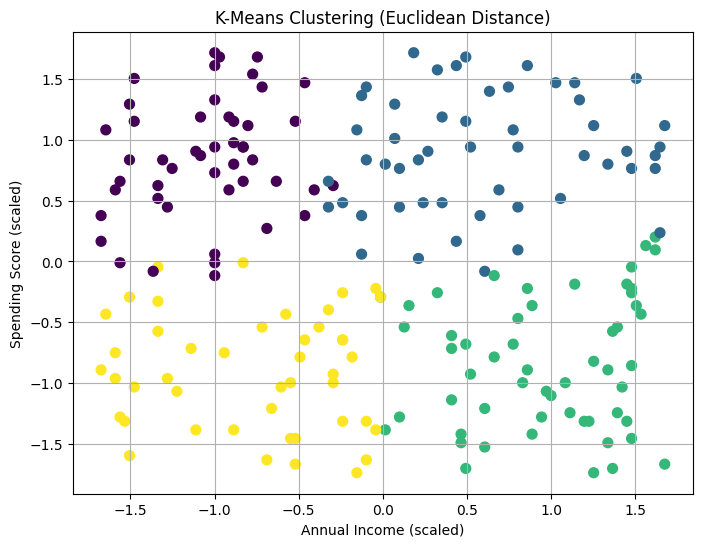

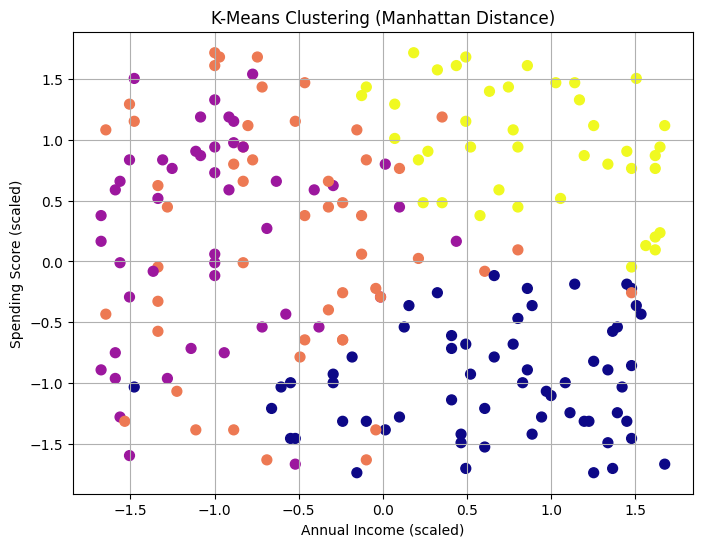

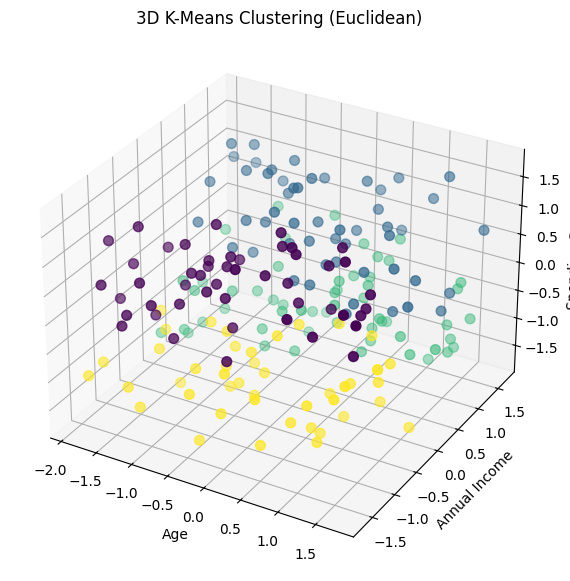

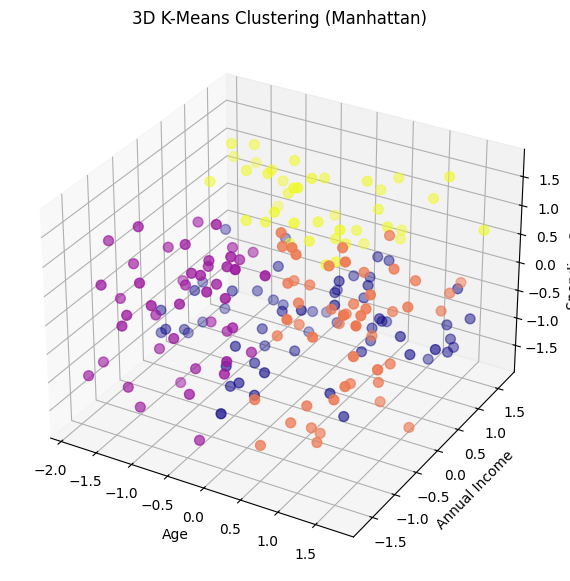

In [5]:
# K-Means Clustering for Customer Segmentation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("customer_segmentation.csv")

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Means (Euclidean Distance) ---
k = 4  # number of clusters
kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(X_scaled)

# --- K-Means (Manhattan Distance) ---
# Compute distances manually using L1 norm (Manhattan)
def manhattan_kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    for _ in range(max_iters):
        distances = cdist(X, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_manhattan, centroids_manhattan = manhattan_kmeans(X_scaled, k)

# Add cluster labels to DataFrame
df['Cluster_Euclidean'] = labels_euclidean
df['Cluster_Manhattan'] = labels_manhattan

print("\n✅ Clustering Complete!")
print(df.head())

# --- 2D Plot (Euclidean) ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels_euclidean, cmap='viridis', s=50)
plt.title('K-Means Clustering (Euclidean Distance)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.grid(True)
plt.show()

# --- 2D Plot (Manhattan) ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels_manhattan, cmap='plasma', s=50)
plt.title('K-Means Clustering (Manhattan Distance)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.grid(True)
plt.show()

# --- 3D Plot (Euclidean) ---
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
           c=labels_euclidean, cmap='viridis', s=50)
ax.set_title('3D K-Means Clustering (Euclidean)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

# --- 3D Plot (Manhattan) ---
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
           c=labels_manhattan, cmap='plasma', s=50)
ax.set_title('3D K-Means Clustering (Manhattan)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()
